# Support Vector Machine (SVM) Algorithm Program

# Load the Breast Cancer Dataset

In [1]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()

# Separate Input Features and Target Variables
Separate the input features and target variables.

In [2]:
# The data variable is a dictionary-like object that holds all the data and some metadata about it.
# The data is stored in the 'data' key while the labels are stored in the 'target' key

# Separate the input features
X = data['data']

# Separate the target variable
y = data['target']

# Build and Train the SVM Classifier
Build and train the SVM classifiers using RBF kernel.

In [3]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import svm

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the SVM classifier
clf = svm.SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
clf.fit(X_train, y_train)

SVC(random_state=42)

# Plot the Scatter Plot of the Input Features
Plot the scatter plot of the input features.

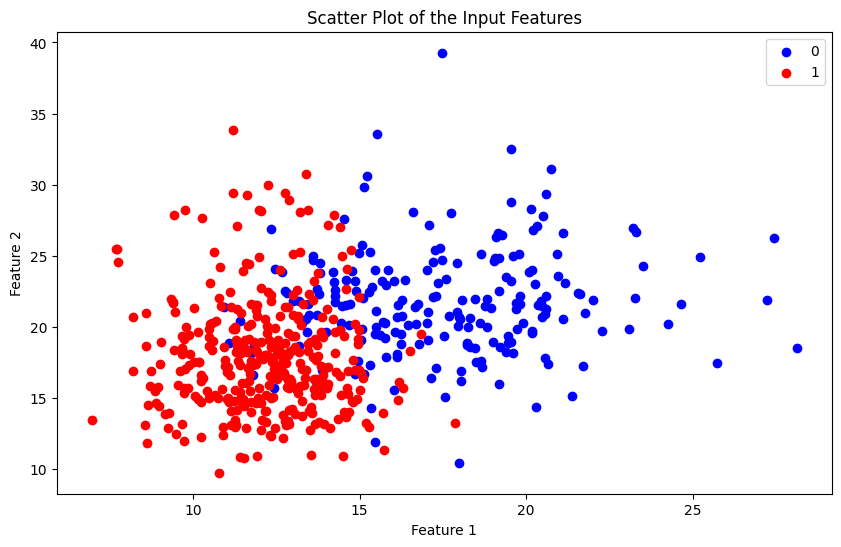

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Select the first two features from the dataset for visualization
X_subset = X[:, :2]

# Create a scatter plot of the selected features
plt.figure(figsize=(10, 6))
plt.scatter(X_subset[y == 0][:, 0], X_subset[y == 0][:, 1], color='b', label='0')
plt.scatter(X_subset[y == 1][:, 0], X_subset[y == 1][:, 1], color='r', label='1')

# Set the title and labels of the plot
plt.title('Scatter Plot of the Input Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the legend
plt.legend()

# Display the plot
plt.show()

# Plot the Decision Boundary
Plot the decision boundary of the SVM classifier.

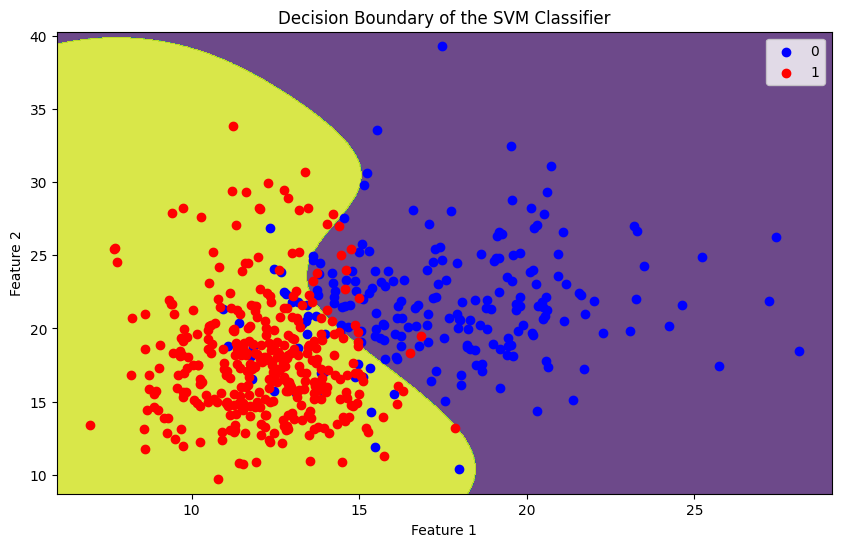

In [6]:
# Import necessary libraries
import numpy as np

# Create a grid to evaluate model
x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Train the classifier with the 2 features
clf_subset = svm.SVC(kernel='rbf', random_state=0)
clf_subset.fit(X_subset, y)

# Predict on the created grid
Z = clf_subset.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the training points
plt.scatter(X_subset[y == 0][:, 0], X_subset[y == 0][:, 1], color='b', label='0')
plt.scatter(X_subset[y == 1][:, 0], X_subset[y == 1][:, 1], color='r', label='1')

# Set the title and labels of the plot
plt.title('Decision Boundary of the SVM Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the legend
plt.legend()

# Display the plot
plt.show()

# Visualize the Train and Test Results
Visualize the train and test results separately in 2 ListedColormaps.

In [15]:
# X_train, X_test is our training and testing data; and 0 and 1 are the indices of the features you want to use
X_train_subset = X_train[:, [0, 1]]
X_test_subset = X_test[:, [0, 1]]

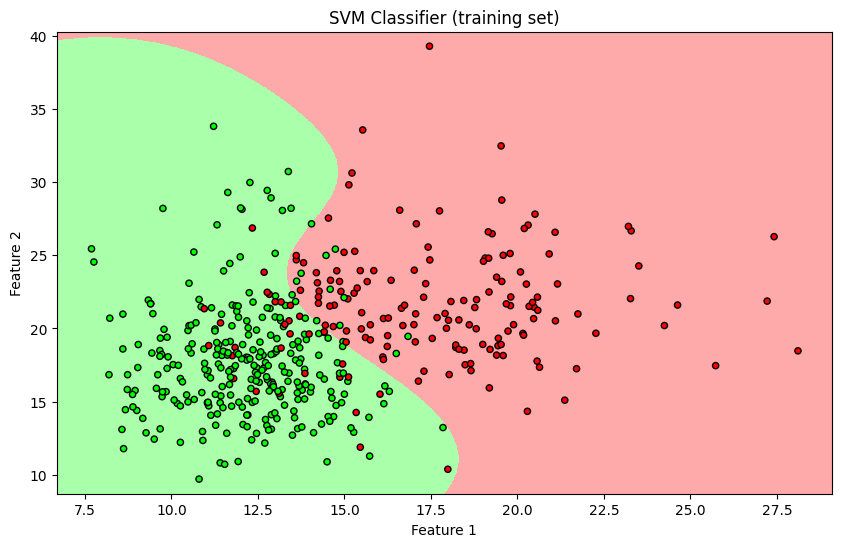

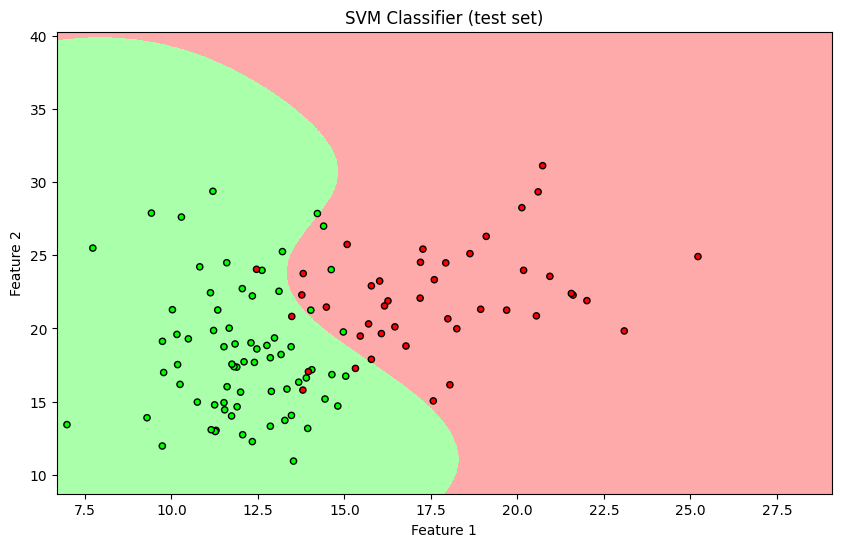

In [16]:
# Import necessary libraries
from matplotlib.colors import ListedColormap

# Define color maps for visualization
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Assume that X_train_subset and X_test_subset are the subsets of your data containing the 2 features you want to plot
# Train the classifier with the 2 features
clf_subset = svm.SVC(kernel='rbf', random_state=0)
clf_subset.fit(X_train_subset, y_train)

# Create a grid to evaluate model
x_min, x_max = X_train_subset[:, 0].min() - 1, X_train_subset[:, 0].max() + 1
y_min, y_max = X_train_subset[:, 1].min() - 1, X_train_subset[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on the created grid
Z = clf_subset.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary for the training data
plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Classifier (training set)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

# Predict on the test set
Z_test = clf_subset.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)

# Plot the decision boundary for the test data
plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, Z_test, cmap=cmap_light)

# Plot the test points
plt.scatter(X_test_subset[:, 0], X_test_subset[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("SVM Classifier (test set)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

# Generate the Classification Report
Generate the classification report using sklearn.metrics.classification_report.

In [9]:
# Import necessary library
from sklearn.metrics import classification_report

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



# Calculate Classification Accuracy and Error
Calculate the classification accuracy and error.

In [10]:
# Import necessary library
from sklearn.metrics import accuracy_score, mean_squared_error

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the classification error
error = mean_squared_error(y_test, y_pred)

# Print the classification accuracy and error
print("Classification Accuracy: ", accuracy)
print("Classification Error: ", error)


Classification Accuracy:  0.9473684210526315
Classification Error:  0.05263157894736842


# Plot the ROC Curve
Plot the ROC curve using sklearn.metrics.roc_curve.

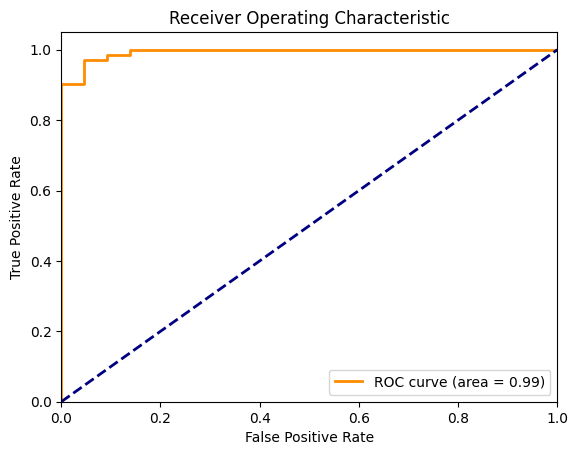

In [11]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute binary-class ROC
y_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()